# Matplotlib入门[05]——注释与标签

> 参考：
>
> + [https://ailearning.apachecn.org/](https://ailearning.apachecn.org/)
> + [Matplotlib官网](https://matplotlib.org/)
>
> + [plt.legend参数](https://blog.csdn.net/yiyue21/article/details/90211702)
>
> 使用Jupyter进行练习



![Logo image](https://matplotlib.org/stable/_static/images/logo2.svg)


## 注释

### 使用文本框进行注释

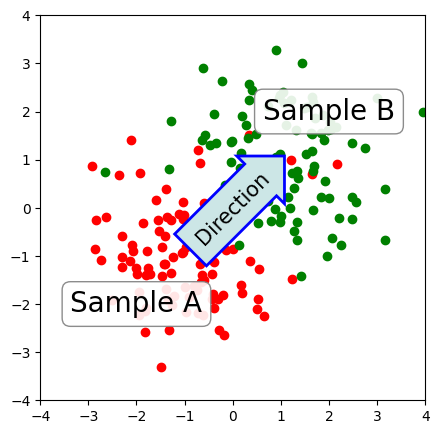

In [2]:
import numpy.random
import matplotlib.pyplot as plt


fig = plt.figure(1, figsize=(5,5))
# plt.clf()清除整个当前graphics的所有坐标轴，但会将窗口打开，
# 以便可以重新用于其他graphics。
fig.clf()

ax = fig.add_subplot(111)
# y轴的单位刻度显示长度 与 x轴的单位刻度显示长度 的比例
ax.set_aspect(1)

x1 = -1 + numpy.random.randn(100)
y1 = -1 + numpy.random.randn(100)
x2 = 1. + numpy.random.randn(100)
y2 = 1. + numpy.random.randn(100)

# 散点图
ax.scatter(x1, y1, color="r")
ax.scatter(x2, y2, color="g")

# 加上两个文本框
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(-2, -2, "Sample A", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(2, 2, "Sample B", ha="center", va="center", size=20,
        bbox=bbox_props)

# 加上一个箭头文本框
bbox_props = dict(boxstyle="rarrow", fc=(0.8,0.9,0.9), ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)

bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

plt.show()

`text()` 函数接受 `bbox` 参数来绘制文本框。

In [3]:
bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="cyan", ec="b", lw=2)
t = ax.text(0, 0, "Direction", ha="center", va="center", rotation=45,
            size=15,
            bbox=bbox_props)

可以这样来获取这个文本框，并对其参数进行修改：

In [4]:
bb = t.get_bbox_patch()
bb.set_boxstyle("rarrow", pad=0.6)

可用的文本框风格有：

| class      | name       | attrs                      |
| ---------- | ---------- | -------------------------- |
| LArrow     | larrow     | pad=0.3                    |
| RArrow     | rarrow     | pad=0.3                    |
| Round      | round      | pad=0.3,rounding_size=None |
| Round4     | round4     | pad=0.3,rounding_size=None |
| Roundtooth | roundtooth | pad=0.3,tooth_size=None    |
| Sawtooth   | sawtooth   | pad=0.3,tooth_size=None    |
| Square     | square     | pad=0.3                    |

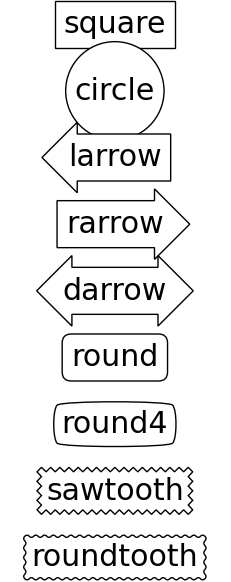

In [5]:
import matplotlib.patches as mpatch
import matplotlib.pyplot as plt

styles = mpatch.BoxStyle.get_styles()

figheight = (len(styles)+.5)
fig1 = plt.figure(figsize=(4/1.5, figheight/1.5))
fontsize = 0.3 * 72
ax = fig1.add_subplot(111)

for i, (stylename, styleclass) in enumerate(styles.items()):
    ax.text(0.5, (float(len(styles)) - 0.5 - i)/figheight, stylename,
              ha="center",
              size=fontsize,
              transform=fig1.transFigure,
              bbox=dict(boxstyle=stylename, fc="w", ec="k"))

# 去掉轴的显示
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.xticks([])
plt.yticks([])

plt.show()

各个风格的文本框如上图所示。

### 使用箭头进行注释

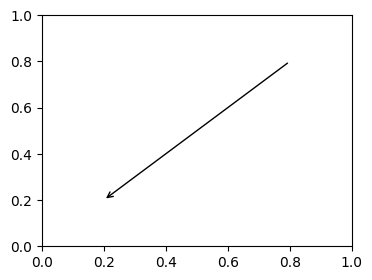

In [6]:
plt.figure(1, figsize=(4,3))
ax = plt.subplot(111)

ax.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), 
            )

plt.show()

之前介绍了 `annotate` 中 `xy, xycoords, xytext, textcoords` 参数的含义，通常我们把 `xy` 设在 `data` 坐标系，把 `xytext` 设在 `offset` 即以注释点为原点的参考系。

箭头显示是可选的，用 `arrowprops` 参数来指定，接受一个字典作为参数。

不同类型的绘制箭头方式

C:\Users\26969\AppData\Local\Temp\ipykernel_2156\2823481789.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.axes_grid import AxesGrid


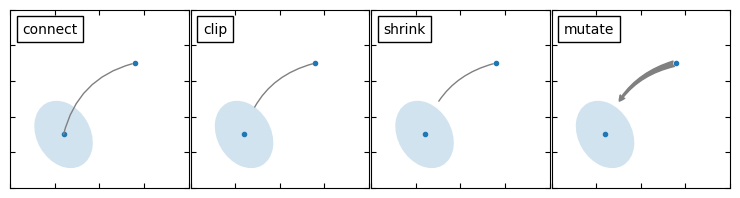

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7

fig = plt.figure(1, figsize=(8,3))
fig.clf()
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

#from matplotlib.font_manager import FontProperties

def add_at(ax, t, loc=2):
    fp = dict(size=10)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at

grid = AxesGrid(fig, 111, (1, 4), label_mode="1", share_all=True)

grid[0].set_autoscale_on(False)

ax = grid[0]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "connect", loc=2)

ax = grid[1]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "clip", loc=2)

ax = grid[2]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "shrink", loc=2)

ax = grid[3]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="fancy", #linestyle="dashed",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )

add_at(ax, "mutate", loc=2)

grid[0].set_xlim(0, 1)
grid[0].set_ylim(0, 1)
grid[0].axis["bottom"].toggle(ticklabels=False)
grid[0].axis["left"].toggle(ticklabels=False)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.draw()
plt.show()

字典中，`connectionstyle` 参数控制路径的风格：

| Name   | Attr                                          |
| ------ | --------------------------------------------- |
| angle  | angleA=90,angleB=0,rad=0.0                    |
| angle3 | angleA=90,angleB=0                            |
| arc    | angleA=0,angleB=0,armA=None,armB=None,rad=0.0 |
| arc3   | rad=0.0                                       |
| bar    | armA=0.0,armB=0.0,fraction=0.3,angle=None     |

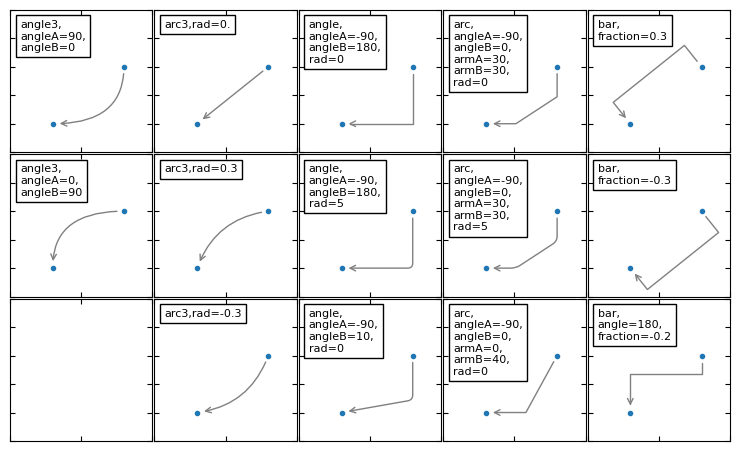

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig = plt.figure(1, figsize=(8,5))
fig.clf()
from mpl_toolkits.axes_grid.axes_grid import AxesGrid
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

#from matplotlib.font_manager import FontProperties

def add_at(ax, t, loc=2):
    fp = dict(size=8)
    _at = AnchoredText(t, loc=loc, prop=fp)
    ax.add_artist(_at)
    return _at

grid = AxesGrid(fig, 111, (3, 5), label_mode="1", share_all=True)

grid[0].set_autoscale_on(False)

x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7

def demo_con_style(ax, connectionstyle, label=None):

    if label is None:
        label = connectionstyle

    x1, y1 = 0.3, 0.2
    x2, y2 = 0.8, 0.6

    ax.plot([x1, x2], [y1, y2], ".")
    ax.annotate("",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                                color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None,
                                patchB=None,
                                connectionstyle=connectionstyle,
                                ),
                )

    add_at(ax, label, loc=2)

column = grid.axes_column[0]

demo_con_style(column[0], "angle3,angleA=90,angleB=0",
               label="angle3,\nangleA=90,\nangleB=0")
demo_con_style(column[1], "angle3,angleA=0,angleB=90",
               label="angle3,\nangleA=0,\nangleB=90")

column = grid.axes_column[1]

demo_con_style(column[0], "arc3,rad=0.")
demo_con_style(column[1], "arc3,rad=0.3")
demo_con_style(column[2], "arc3,rad=-0.3")

column = grid.axes_column[2]

demo_con_style(column[0], "angle,angleA=-90,angleB=180,rad=0",
               label="angle,\nangleA=-90,\nangleB=180,\nrad=0")
demo_con_style(column[1], "angle,angleA=-90,angleB=180,rad=5",
               label="angle,\nangleA=-90,\nangleB=180,\nrad=5")
demo_con_style(column[2], "angle,angleA=-90,angleB=10,rad=5",
               label="angle,\nangleA=-90,\nangleB=10,\nrad=0")

column = grid.axes_column[3]

demo_con_style(column[0], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=0",
               label="arc,\nangleA=-90,\nangleB=0,\narmA=30,\narmB=30,\nrad=0")
demo_con_style(column[1], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5",
               label="arc,\nangleA=-90,\nangleB=0,\narmA=30,\narmB=30,\nrad=5")
demo_con_style(column[2], "arc,angleA=-90,angleB=0,armA=0,armB=40,rad=0",
               label="arc,\nangleA=-90,\nangleB=0,\narmA=0,\narmB=40,\nrad=0")

column = grid.axes_column[4]

demo_con_style(column[0], "bar,fraction=0.3",
               label="bar,\nfraction=0.3")
demo_con_style(column[1], "bar,fraction=-0.3",
               label="bar,\nfraction=-0.3")
demo_con_style(column[2], "bar,angle=180,fraction=-0.2",
               label="bar,\nangle=180,\nfraction=-0.2")

#demo_con_style(column[1], "arc3,rad=0.3")
#demo_con_style(column[2], "arc3,rad=-0.3")

grid[0].set_xlim(0, 1)
grid[0].set_ylim(0, 1)
grid.axes_llc.axis["bottom"].toggle(ticklabels=False)
grid.axes_llc.axis["left"].toggle(ticklabels=False)
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

plt.draw()
plt.show()

`arrowstyle` 参数控制小箭头的风格：

| Name      | Attrs                                         |
| --------- | --------------------------------------------- |
| `-`       | None                                          |
| `->`      | head_length=0.4,head_width=0.2                |
| `-[`      | widthB=1.0,lengthB=0.2,angleB=None            |
| ¦`-`¦     | widthA=1.0,widthB=1.0                         |
| `-`¦`>`   | head_length=0.4,head_width=0.2                |
| `<-`      | head_length=0.4,head_width=0.2                |
| `<->`     | head_length=0.4,head_width=0.2                |
| `<`¦`-`   | head_length=0.4,head_width=0.2                |
| `<`¦-¦`>` | head_length=0.4,head_width=0.2                |
| `fancy`   | head_length=0.4,head_width=0.4,tail_width=0.4 |
| `simple`  | head_length=0.5,head_width=0.5,tail_width=0.2 |
| `wedge`   | tail_width=0.3,shrink_factor=0.5              |

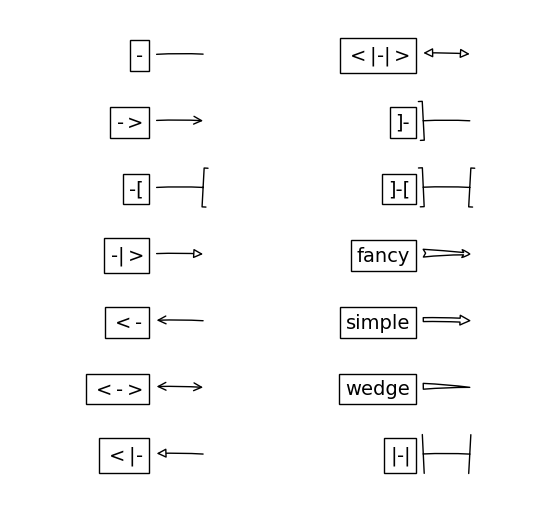

In [9]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

styles = mpatches.ArrowStyle.get_styles()

ncol=2
nrow = (len(styles)+1) // ncol
figheight = (nrow+0.5)
fig1 = plt.figure(1, (4.*ncol/1.5, figheight/1.5))
fontsize = 0.2 * 70

ax = fig1.add_axes([0, 0, 1, 1], frameon=False, aspect=1.)

ax.set_xlim(0, 4*ncol)
ax.set_ylim(0, figheight)

def to_texstring(s):
    s = s.replace("<", r"$<$")
    s = s.replace(">", r"$>$")
    s = s.replace("|", r"$|$")
    return s

for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
    x = 3.2 + (i//nrow)*4
    y = (figheight - 0.7 - i%nrow) # /figheight
    p = mpatches.Circle((x, y), 0.2, fc="w")
    ax.add_patch(p)

    ax.annotate(to_texstring(stylename), (x, y),
                (x-1.2, y),
                #xycoords="figure fraction", textcoords="figure fraction",
                ha="right", va="center",
                size=fontsize,
                arrowprops=dict(arrowstyle=stylename,
                                patchB=p,
                                shrinkA=5,
                                shrinkB=5,
                                fc="w", ec="k",
                                connectionstyle="arc3,rad=-0.05",
                                ),
                bbox=dict(boxstyle="square", fc="w"))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.draw()
plt.show()


## 标签

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

`legend()` 函数被用来添加图像的标签，其主要相关的属性有：

- legend entry - 一个 legend 包含一个或多个 entry，一个 entry 对应一个 key 和一个 label
- legend key - marker 的标记
- legend label - key 的说明
- legend handle - 一个 entry 在图上对应的对象

### 使用legend

参数：
+ `loc`: 显示位置，若是使用了bbox_to_anchor，则这项就无效了
  + 'best'         : 0, (only implemented for axes legends)(自适应方式)
  + 'upper right'  : 1,
  + 'upper left'   : 2,
  + 'lower left'   : 3,
  + 'lower right'  : 4,
  + 'right'        : 5,
  + 'center left'  : 6,
  + 'center right' : 7,
  + 'lower center' : 8,
  + 'upper center' : 9,
  + 'center'       : 10

+ `fontsize`： 字体大小，
+ `frameon`： 是否显示图例边框，
+ `ncol`： 图例的列的数量，一般为1,
+ `title`: 为图例添加标题
+ `shadow`: 为图例边框添加阴影,
+ `markerfirst`: True表示图例标签在句柄右侧，false反之，
+ `markerscale`： 图例标记为原图标记中的多少倍大小，
+ `numpoints`: 表示图例中的句柄上的标记点的个数，一般设为1,
+ `fancybox`: 是否将图例框的边角设为圆形
+ `framealpha`: 控制图例框的透明度
+ `borderpad`: 图例框内边距
+ `labelspacing`: 图例中条目之间的距离
+ `handlelength`: 图例句柄的长度
+ `bbox_to_anchor`: (横向看右，纵向看下),如果要自定义图例位置或者将图例画在坐标外边，用它。


调用 `legend()` 会自动获取当前的 `Axes` 对象，并且得到这些 handles 和 labels，相当于：
```python
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels) 
```

可以在函数中指定 handles 的参数：

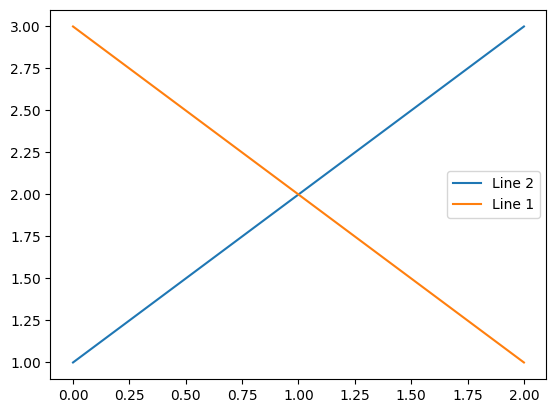

In [11]:
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend(handles=[line_up, line_down])
plt.show()

可以将 `labels` 作为参数输入 `legend` 函数：

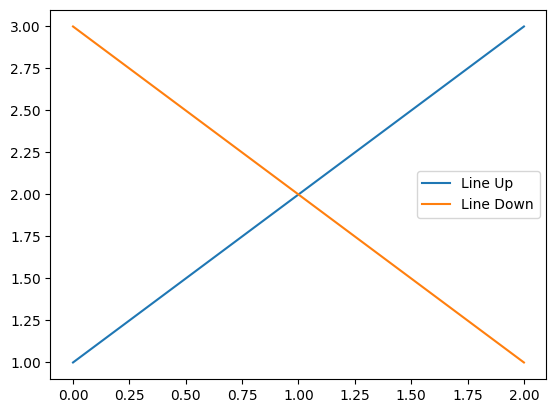

In [12]:
line_up, = plt.plot([1,2,3])
line_down, = plt.plot([3,2,1])
plt.legend([line_up, line_down], ['Line Up', 'Line Down'])
plt.show()

### 特殊形状的maker key

块状

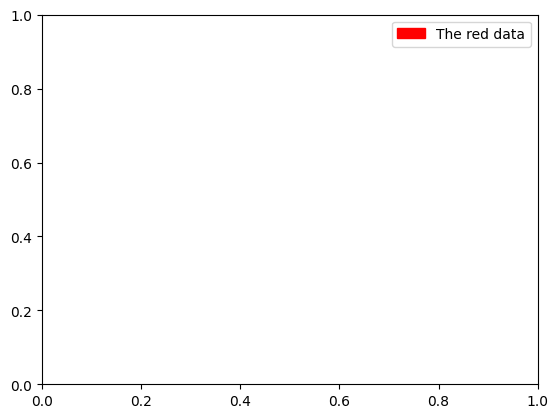

In [13]:
# 拥有一些比较常用的形状：箭头、正方形、椭圆等
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])

plt.show()

点线组合

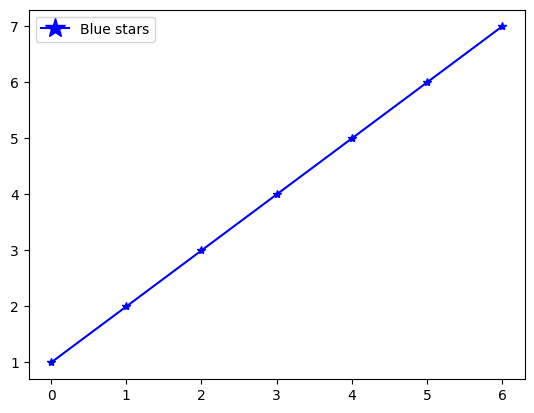

In [14]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

blue_line = mlines.Line2D([1,2,3], [1,2,3], color='blue', marker='*',
                          markersize=15, label='Blue stars')
plt.plot([1,2,3,4,5,6,7],'b*-')
plt.legend(handles=[blue_line])

plt.show()

### 指定legend的位置

`bbox_to_anchor` 关键词可以指定 `legend` 放置的位置，例如放到图像的右上角：

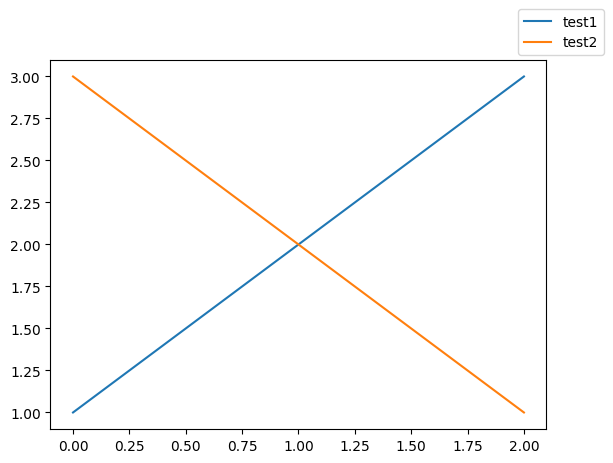

In [15]:
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)

plt.show()

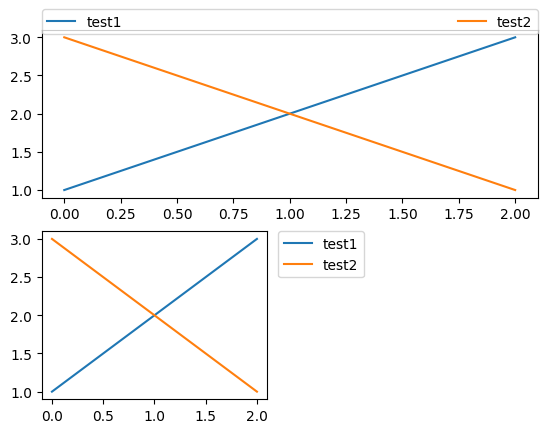

In [16]:
plt.subplot(211)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# 将标签放在图像上方，并进行延长
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(223)
plt.plot([1,2,3], label="test1")
plt.plot([3,2,1], label="test2")
# 将标签放在小图形的右方
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### 同一个 Axes 中的多个 legend

原始效果：

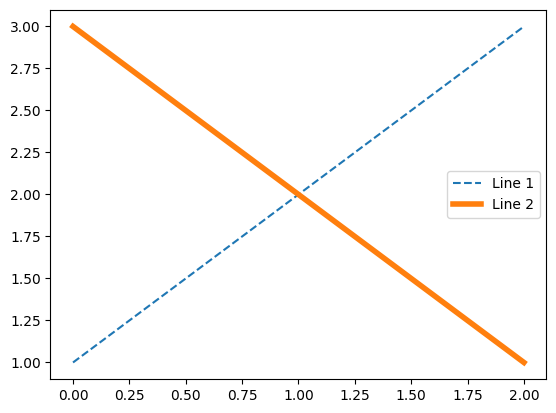

In [17]:
line1, = plt.plot([1,2,3], label="Line 1", linestyle='--')
line2, = plt.plot([3,2,1], label="Line 2", linewidth=4)
plt.legend()
plt.show()

添加多个`legend`:

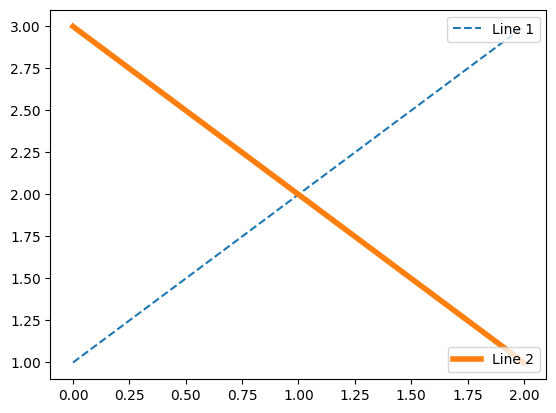

In [18]:
line1, = plt.plot([1,2,3], label="Line 1", linestyle='--')
line2, = plt.plot([3,2,1], label="Line 2", linewidth=4)
# 为第一条线添加legend
first_legend = plt.legend(handles=[line1], loc=1)

# 将legend手动添加到当前的Axes.
ax = plt.gca().add_artist(first_legend)

# 为第二条线添加legend
plt.legend(handles=[line2], loc=4)

plt.show()

### 更多用法


多个`handle`可以通过括号组合在一个`entry`里。

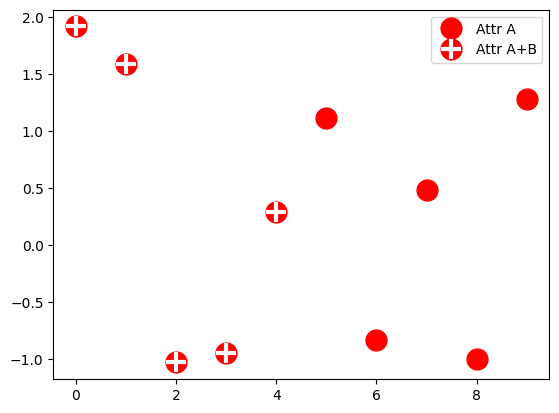

In [22]:
from numpy.random import randn

z = randn(10)

red_dot, = plt.plot(z, "ro", markersize=15)
# 给数据加上白色十字.
white_cross, = plt.plot(z[:5], "w+", markeredgewidth=3, markersize=15)

plt.legend([red_dot, (red_dot, white_cross)], ["Attr A", "Attr A+B"])

plt.show()

自定义`handle`：

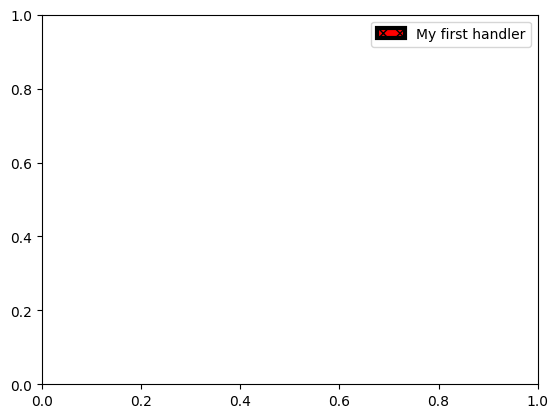

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

class AnyObject(object):
    pass

class AnyObjectHandler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch = mpatches.Rectangle([x0, y0], width, height, facecolor='red',
                                   edgecolor='black', hatch='xx', lw=3,
                                   transform=handlebox.get_transform())
        handlebox.add_artist(patch)
        return patch

plt.legend([AnyObject()], ['My first handler'],
           handler_map={AnyObject: AnyObjectHandler()})

plt.show()

椭圆

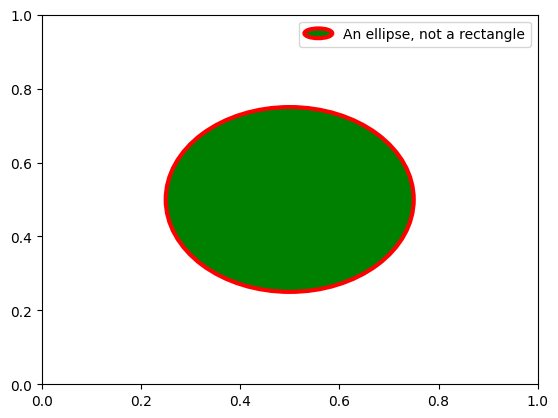

In [25]:
from matplotlib.legend_handler import HandlerPatch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=width + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

c = mpatches.Circle((0.5, 0.5), 0.25, facecolor="green",
                    edgecolor="red", linewidth=3)
plt.gca().add_patch(c)

plt.legend([c], ["An ellipse, not a rectangle"],
           handler_map={mpatches.Circle: HandlerEllipse()})

plt.show()